In [ ]:
# 11.Prepare a model for prediction of prostate cancer using KNN neighbor.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/prostate.csv")
df.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [ ]:
df.shape

(97, 9)

In [ ]:
x=df.drop("Target",axis=1) # Independent feature
y=df['Target'] # dependent feature


2

In [ ]:
# Feature scaling
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(x),
                   columns = df.columns[:-1])
df1.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1) # random_state is used to control the randomness of the train and test data .Each time you run the code split the same

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1) # number of neighbors as 1
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[18  4]
 [ 6  2]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.33      0.25      0.29         8

    accuracy                           0.67        30
   macro avg       0.54      0.53      0.53        30
weighted avg       0.64      0.67      0.65        30



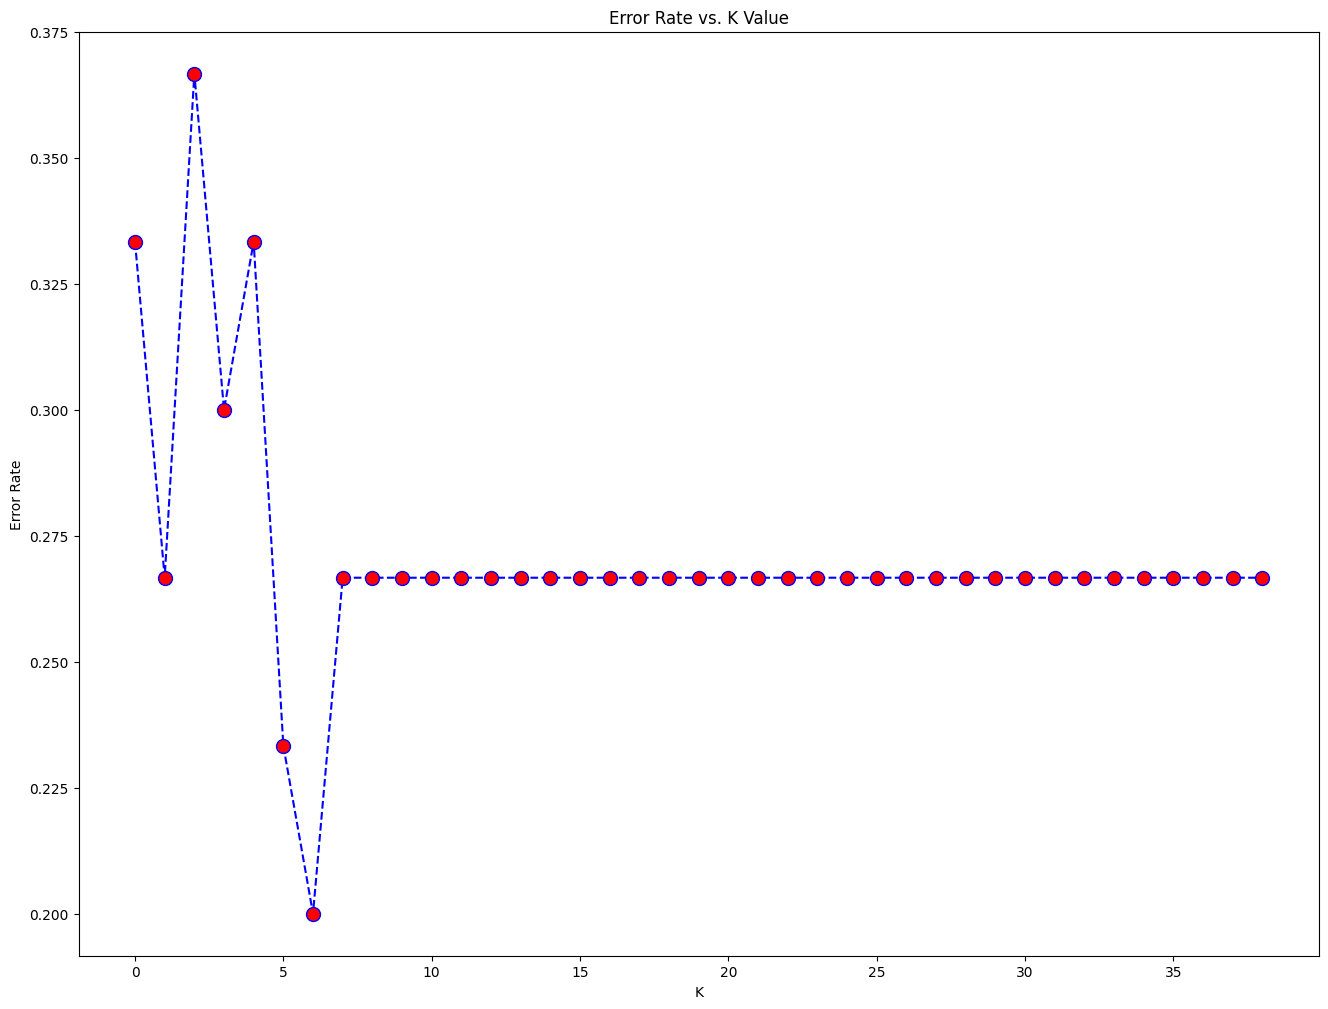

In [ ]:
# Elbow method for calculating the k-neighbors
error_rate=[]

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train,y_train)
  new_y_pred = knn.predict(x_test)
  error_rate.append(np.mean(new_y_pred != y_test))

plt.figure(figsize=(16,12))
plt.plot(error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()